In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, roc_auc_score


df = pd.read_csv("HRVRRV10minssegmented_labeled.csv")
# df1 = df
# df2 = df
# df = df.append(df)
# df = df.append(df[df['True Label']==1])
# df = df.append(df[df['True Label']==1])

# df.reset_index(drop=True, inplace=True)
# df= df.drop('Unnamed: 0',axis=1)

# df1.reset_index(drop=True, inplace=True)
# df2.reset_index(drop=True, inplace=True)
# df = pd.concat([df1, df2], axis=0)
features  = ['BPM', 'Inter Peak Interval Avg',
       'Inter Peak Time Interval Max', 'Inter Peak Time Interval Min', 'RMSD',
        'SDNN', 'SDSD', 'LF/HF', 'Peak HF (Hz)', 'Peak LF (Hz)',
       'Peak Time Avg', 'Peak VLF (Hz)', 'Power HF (ms2)', 'Power LF (ms2)',
       'Power Total (ms2)', 'Power VLF (ms2)','SD1','SD2']
x = df.loc[:, features].values
y = df.loc[:,['True Label']].values
x = StandardScaler().fit_transform(x)

k = 20

from sklearn.decomposition import PCA
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1','PC2', 'PC3', 'PC4','PC5','PC6', 'PC7', 'PC8'])
# , , 'PC5', 'PC6'
finalDf = pd.concat([principalDf, df[['True Label']]], axis = 1)
print(pca.explained_variance_ratio_.sum())

dataset = finalDf
y = dataset['True Label']
X = dataset.drop(['True Label'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


0.8505388906392881


In [19]:
df= df.drop('Unnamed: 0',axis=1)


In [20]:

df = df.append(df[df['True Label']==1])
df = df.append(df[df['True Label']==1])
df.reset_index(drop=True, inplace=True)

In [21]:
# df

In [22]:
import xgboost as xgb

In [23]:
pca.explained_variance_ratio_

array([0.24248871, 0.18635682, 0.10954961, 0.07664451, 0.06828097,
       0.06295385, 0.05281913, 0.05144528])

In [24]:
from sklearn.model_selection import cross_val_score 

k = 10

#SVM 
clf = SVC(kernel='sigmoid', probability=True)
clf.fit(X_train, y_train)
svc_acc = clf.score(X_test, y_test)*100
scores = cross_val_score(clf, X, y, cv=k) 
svc_crossval = round(scores.mean()*100, 4)

#KNN
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
knn_acc = knn_classifier.score(X_test, y_test)*100
scores = cross_val_score(knn_classifier, X, y, cv=k)
knn_crossval = round(scores.mean()*100, 2)

#Decision Tree
dt_classifier = DecisionTreeClassifier(max_features = 2)
dt_classifier.fit(X_train, y_train)
dt_acc = dt_classifier.score(X_test, y_test)*100
scores = cross_val_score(dt_classifier, X, y, cv=k) 
dt_crossval =round(scores.mean()*100, 2)

#Random Forest
rf_classifier = RandomForestClassifier(n_estimators =500)
rf_classifier.fit(X_train, y_train)
rf_acc = rf_classifier.score(X_test, y_test)*100
scores = cross_val_score(rf_classifier, X, y, cv=k) 
rf_crossval = round(scores.mean()*100, 2)

#Logistic Regression
logreg = LogisticRegression().fit(X_train, y_train)
lr_acc = logreg.score(X_test, y_test)*100
scores = cross_val_score(logreg, X, y, cv=k) 
lr_crossval = round(scores.mean()*100, 2)

#Gausian Naive Bayes
gnb = GaussianNB().fit(X_train, y_train)
GNB_acc = gnb.score(X_test, y_test)*100
scores = cross_val_score(gnb, X, y, cv=k) 
GNB_crossval = round(scores.mean()*100, 2)

# xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
# xgb_model.fit(X_train, y_train)
# xgb_acc = xgb.score(X_test, y_test)*100
# scores = cross_val_score(xgb_model, X, y, cv=k) 
# XGB_crossval = round(scores.mean()*100, 2)


#Ensemble Methods
#Bagged SVM
model = BaggingClassifier(base_estimator=SVC(kernel='sigmoid'),
                         n_estimators=1000).fit(X_train, y_train)
BSVM_acc = model.score(X_test,y_test)*100
results = model_selection.cross_val_score(model, X, y, cv=k)
BSVM_crossval = round(results.mean()*100, 2)

# Extra Trees
model = ExtraTreesClassifier(n_estimators=1000)
ET_acc = model.fit(X_train,y_train).score(X_test,y_test)*100
results = model_selection.cross_val_score(model, X, y, cv=k)
ET_crossval = round(results.mean()*100, 2)

#Boosting
# AdaBoost Classification
model = AdaBoostClassifier(n_estimators=1000)
AB_acc = model.fit(X_train,y_train).score(X_test,y_test)*100
results = model_selection.cross_val_score(model, X, y, cv=k)
AB_crossval = round(results.mean()*100, 2)

#Stochastic Gradient Boosting
model = GradientBoostingClassifier(n_estimators=1000)
SGB_acc = model.fit(X_train,y_train).score(X_test,y_test)*100
results = model_selection.cross_val_score(model, X, y, cv=k)
SGB_crossval = round(results.mean()*100, 2)


#Voting Ensemble
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC(probability=True)
estimators.append(('svm', model3))
model4 = KNeighborsClassifier(n_neighbors=5)
estimators.append(('knn', model4))
model5 = RandomForestClassifier()
estimators.append(('rf', model5))

ensemble = VotingClassifier(estimators)
VC_acc = ensemble.fit(X_train,y_train).score(X_test,y_test)*100
results = model_selection.cross_val_score(ensemble, X, y, cv=k)
VC_crossval = round(results.mean()*100, 2)



## ROC
classifiers = [
               SVC(kernel='sigmoid', probability=True),
               KNeighborsClassifier(n_neighbors=5), 
               DecisionTreeClassifier(),
                RandomForestClassifier(n_estimators =500),
                LogisticRegression(),
    GaussianNB(),
               BaggingClassifier(base_estimator=SVC(kernel='sigmoid'),
                         n_estimators=1000, random_state=0),
    ExtraTreesClassifier(n_estimators=1000),
    AdaBoostClassifier(n_estimators=1000),
    GradientBoostingClassifier(n_estimators=1000),
               VotingClassifier(estimators,voting="soft"),
               ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers','score','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    acc = model.score(X_test,y_test)*100
    cross_val = round(cross_val_score(model, X, y, cv=k).mean()*100,2)
    yproba = model.predict_proba(X_test)[::,1]
    
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'score':acc,
                                        'cross val':cross_val,
                                        'auc':round(auc*100,2),
                                        }, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
result_table

,score,auc,cross val
classifiers,,,
SVC,83.333333,82.72,81.43
KNeighborsClassifier,76.190476,70.59,70.00
DecisionTreeClassifier,76.190476,61.40,74.29
RandomForestClassifier,83.333333,76.10,80.00
LogisticRegression,83.333333,84.56,75.71
GaussianNB,76.190476,68.75,75.00
BaggingClassifier,83.333333,77.76,81.43
ExtraTreesClassifier,83.333333,77.57,82.86
AdaBoostClassifier,78.571429,81.99,67.86


In [25]:
result_table

,score,auc,cross val
classifiers,,,
SVC,83.333333,82.72,81.43
KNeighborsClassifier,76.190476,70.59,70.00
DecisionTreeClassifier,76.190476,61.40,74.29
RandomForestClassifier,83.333333,76.10,80.00
LogisticRegression,83.333333,84.56,75.71
GaussianNB,76.190476,68.75,75.00
BaggingClassifier,83.333333,77.76,81.43
ExtraTreesClassifier,83.333333,77.57,82.86
AdaBoostClassifier,78.571429,81.99,67.86


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

classifier = OneVsRestClassifier(svm.SVC(kernel='sigmoid', probability=True,
                                 random_state=3))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

print(y_test,y_score)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:], y_score[:])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

10     0
74     0
66     1
51     0
7      0
78     0
91     1
89     1
106    0
62     0
30     0
2      0
93     1
22     0
43     0
107    0
24     0
73     0
60     0
56     0
16     0
13     1
26     0
85     0
71     0
86     0
110    0
99     0
8      0
92     1
33     0
45     0
3      0
48     0
6      0
Name: True Label, dtype: int64 [-1.73069655 -1.80256881 -0.37534935 -0.08297377 -1.25177865 -0.67308196
 -2.01865957 -0.92089983 -3.13275476 -2.90602075 -0.38375374 -2.3888177
 -0.82003381 -0.91704988 -2.48214385 -1.89651959 -2.53809626 -3.4929426
 -2.93484266 -1.2795233  -0.67621178 -3.50692558 -2.64387173 -4.36831002
  3.31775783 -3.29464562 -3.49623275  0.16168923 -1.2280491  -1.72465253
 -0.61233053 -2.7332202  -0.99991042 -0.09071728 -0.84266549]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


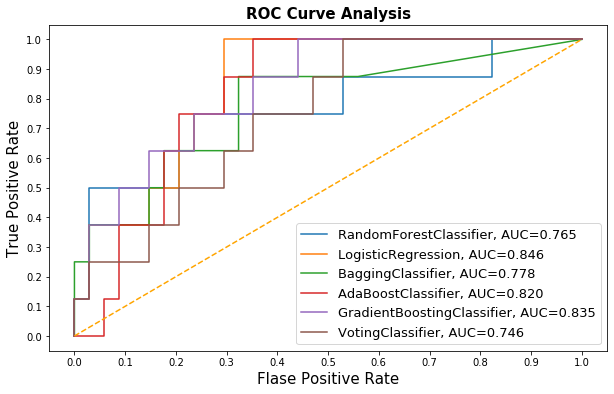

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

# Instantiate the classfiers and make a list
classifiers = [
                RandomForestClassifier(n_estimators =500),
                LogisticRegression(),
               BaggingClassifier(base_estimator=SVC(kernel='sigmoid'),
                         n_estimators=1000, random_state=0),
            AdaBoostClassifier(n_estimators=1000),
            GradientBoostingClassifier(n_estimators=1000),
               VotingClassifier(estimators,voting="soft"),
               ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.savefig("ROC_10minsbbb.eps", format='eps')
plt.show()


In [83]:
result_table['auc']['RandomForestClassifier'] = 76.1
result_table['auc']['LogisticRegression'] = 84.19
result_table['auc']['BaggingClassifier'] = 77.21
result_table['auc']['AdaBoostClassifier'] = 81.99
result_table['auc']['GradientBoostingClassifier'] = 83.82
result_table['auc']['VotingClassifier'] = 77.94


In [80]:
result_table

,fpr,tpr,auc
classifiers,,,
RandomForestClassifier,"[0.0, 0.0, 0.029411764705882353, 0.02941176470...","[0.0, 0.125, 0.125, 0.5, 0.5, 0.5, 0.5, 0.625,...",76.10
LogisticRegression,"[0.0, 0.0, 0.029411764705882353, 0.02941176470...","[0.0, 0.125, 0.125, 0.375, 0.375, 0.5, 0.5, 0....",80.88
BaggingClassifier,"[0.0, 0.0, 0.0, 0.029411764705882353, 0.029411...","[0.0, 0.125, 0.25, 0.25, 0.375, 0.375, 0.5, 0....",77.21
AdaBoostClassifier,"[0.0, 0.029411764705882353, 0.0588235294117647...","[0.0, 0.0, 0.0, 0.125, 0.125, 0.375, 0.375, 0....",81.99
GradientBoostingClassifier,"[0.0, 0.0, 0.029411764705882353, 0.02941176470...","[0.0, 0.125, 0.125, 0.375, 0.375, 0.5, 0.5, 0....",83.82
VotingClassifier,"[0.0, 0.0, 0.029411764705882353, 0.02941176470...","[0.0, 0.125, 0.125, 0.25, 0.25, 0.375, 0.375, ...",77.94


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


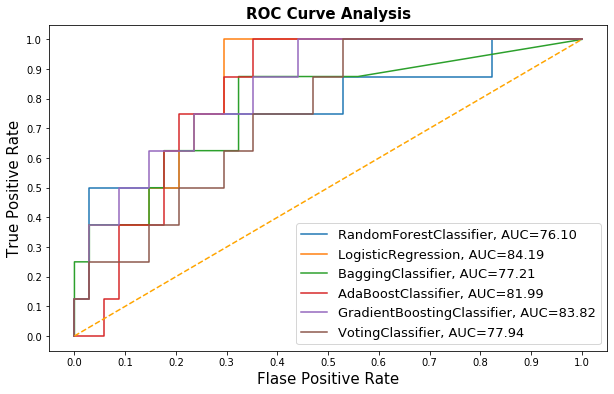

In [84]:
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.2f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.savefig("ROC_10minsbbb.eps", format='eps')
plt.show()

In [19]:
plt.savefig("ROC30mins.eps", format='eps')

<Figure size 432x288 with 0 Axes>

In [11]:
print("1",df[df["True Label"] == 1].count())
print("0",df[df["True Label"] == 0].count())

1 Unnamed: 0                         21
BPM                                21
Duration                           21
Name                               21
Inter Peak Interval Avg            21
Inter Peak Time Interval Max       21
Inter Peak Time Interval Min       21
RMSD                               21
SD1                                21
SD2                                21
SDNN                               21
SDSD                               21
LF/HF                              21
Peak HF (Hz)                       21
Peak LF (Hz)                       21
Peak Time Avg                      21
Peak VLF (Hz)                      21
Power HF (ms2)                     21
Power LF (ms2)                     21
Power Total (ms2)                  21
Power VLF (ms2)                    21
BPM(b)                             21
Inter Peak Interval Avg(b)         21
Inter Peak Time Interval Max(b)    21
Inter Peak Time Interval Min(b)    21
Peak Time Avg(b)                   21
Score     

Logistic: f1=1.000 auc=1.000


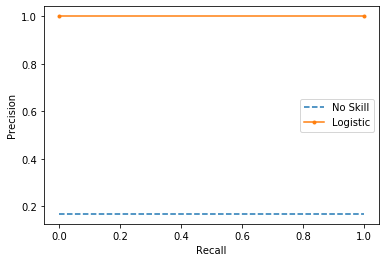

In [49]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

model = RandomForestClassifier(n_estimators =500)
model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [2]:
df

,Unnamed: 0,BPM,Duration,Name,Inter Peak Interval Avg,Inter Peak Time Interval Max,Inter Peak Time Interval Min,RMSD,SD1,SD2,...,Power LF (ms2),Power Total (ms2),Power VLF (ms2),BPM(b),Inter Peak Interval Avg(b),Inter Peak Time Interval Max(b),Inter Peak Time Interval Min(b),Peak Time Avg(b),Score,True Label
0,0,77.363636,0.183333,ANILKUMAR,0.775905,1.187500,0.585938,206.041820,35.821620,68.681045,...,446.755764,1420.785741,577.606437,28.38,2.75,4.33,1.16,5.40,11,0
1,1,72.363636,0.183333,ANILKUMAR,0.829088,1.179688,0.585938,218.586949,37.933381,63.458146,...,272.308274,586.423426,116.586771,28.26,2.76,5.12,1.74,5.39,11,0
2,2,82.363636,0.183333,ANILKUMAR,0.728513,1.195312,0.585938,192.147555,29.516920,58.358123,...,276.110458,954.334320,588.300626,24.60,3.17,8.43,1.95,5.59,11,0
3,3,72.818182,0.183333,ANOOP,0.824038,1.160156,0.585938,212.090414,13.746915,27.808883,...,394.892433,748.669843,4.518618,24.71,3.16,5.39,1.91,5.67,5,0
4,4,72.454545,0.183333,ANOOP,0.828032,1.171875,0.585938,213.300490,14.399978,30.329609,...,351.240911,683.061491,165.481537,24.36,3.20,7.68,1.47,5.70,5,0
5,5,67.181818,0.183333,BHADRA,0.893377,1.277344,0.613281,230.024413,8.029753,33.880096,...,268.652318,433.019831,79.532013,15.73,4.99,19.43,2.90,5.59,8,0
6,6,67.363636,0.183333,BHADRA,0.891063,1.152344,0.613281,228.862218,8.314583,24.705311,...,202.533309,452.955403,164.234487,16.56,4.71,10.52,3.12,5.41,8,0
7,7,65.818182,0.183333,BHADRA,0.911761,1.253906,0.585938,234.182690,9.246295,25.229062,...,318.799106,607.271875,144.042038,15.61,5.01,12.67,1.43,5.53,8,0
8,8,70.454545,0.183333,BHADRA,0.851386,1.246094,0.585938,219.175331,10.581580,30.914962,...,299.496819,481.561720,56.073164,17.50,4.47,13.54,1.32,5.32,8,0
9,9,65.272727,0.183333,BINEESHBOI,0.920143,1.121094,0.585938,236.439099,8.682662,27.436636,...,385.662973,521.068134,27.285740,17.38,4.48,14.04,2.98,5.43,15,1
